# TELCO CHURN ANALYSIS

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt

sns.set(style = 'white')

import os

In [3]:
df = pd.read_csv('Telco-Customer-Churn-updated.csv')

In [4]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1423-BMPBQ,Female,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.0,19.00,No
1,3807-XHCJH,Female,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20.0,20.00,No
2,7698-YFGEZ,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.0,20.00,No
3,4877-EVATK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.0,20.00,Yes
4,6770-XUAGN,Female,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.0,21.00,Yes
5,5701-SVCWR,Female,0,No,Yes,1,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,24.0,24.00,No
6,8896-BQTTI,Male,0,No,No,1,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,25.0,25.00,No
7,3841-CONLJ,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,35.0,35.00,No
8,4237-CLSMM,Male,0,Yes,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.0,38.00,No
9,5522-JBWMO,Male,0,No,Yes,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,44.0,44.00,No


In [5]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Correlation

In [7]:
#Removing missing values 
df.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = df.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,19.0,19.0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
1,0,1,20.0,20.0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,0,1,20.0,20.0,0,0,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
3,0,1,20.0,20.0,1,0,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
4,0,1,21.0,21.0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0


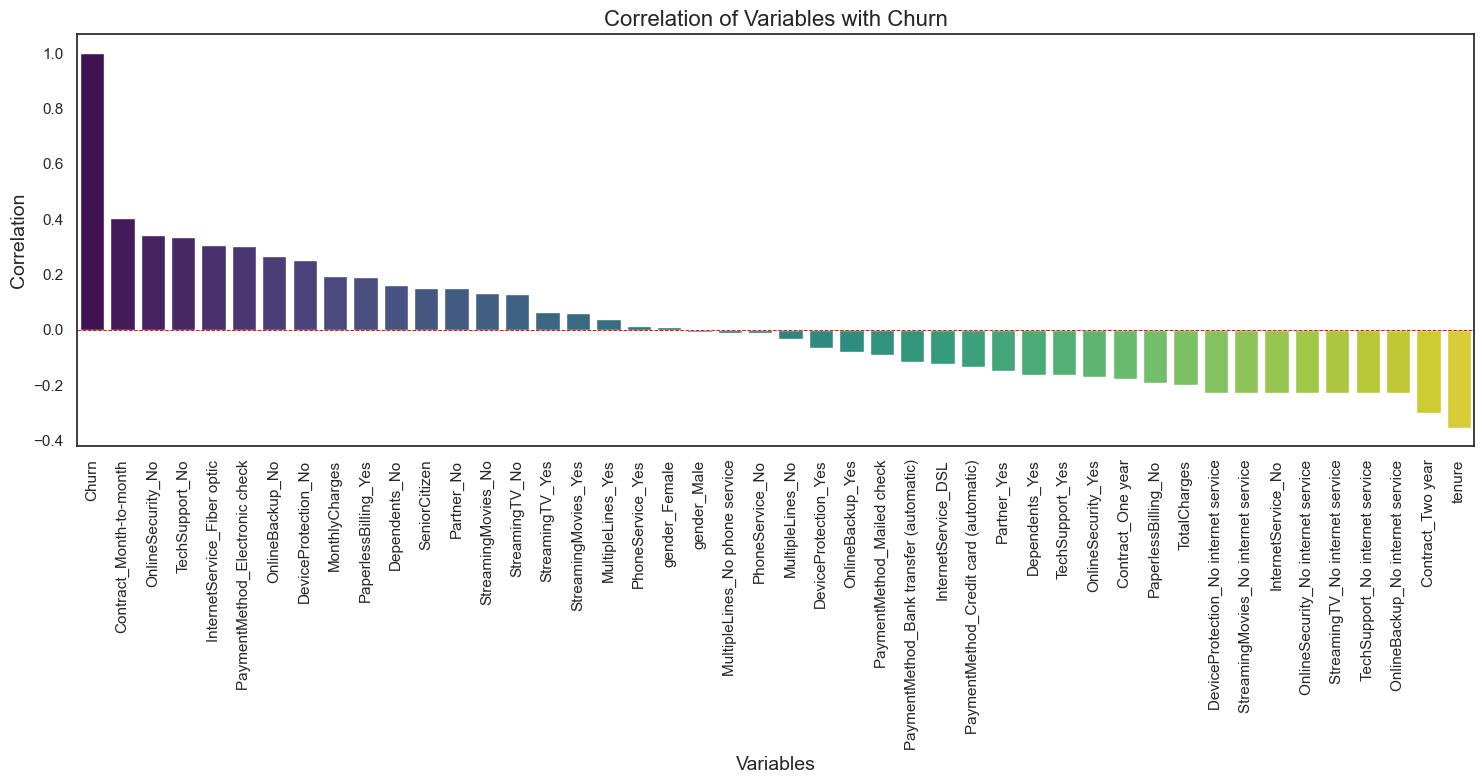

In [11]:
# Configuración de tamaño de la figura
plt.figure(figsize=(15, 8))

# Cálculo de la correlación y ordenamiento de los valores
correlation = df_dummies.corr()['Churn'].sort_values(ascending=False)

# Creación del gráfico de barras
sns.barplot(x=correlation.index, y=correlation.values, palette='viridis')

# Título y etiquetas de los ejes
plt.title('Correlation of Variables with Churn', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Correlation', fontsize=14)

# Rotación de las etiquetas del eje x
plt.xticks(rotation=90)

# Línea de referencia en el eje x para la correlación nula
plt.axhline(0, color='red', linewidth=0.7, linestyle='--')

# Ajuste de los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Top variables that has impact on churned customers:
- Month to month contracts
- Absence of online security
- No tech support contracted

Top variables that has no impact on churned customers:
- Tenure
- Two year contracts
- Online Backups (when customer doesnt have internet service)

# Percentage By Gender

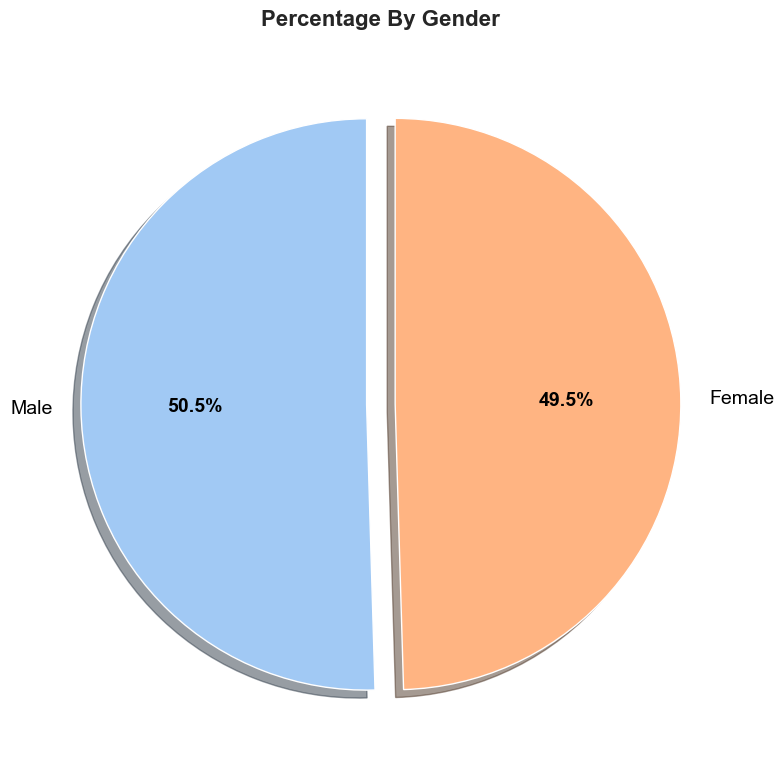

In [13]:
# Datos
gender_counts = df["gender"].value_counts()

# Configuración de la figura
plt.figure(figsize=(8, 8))

# Creación del gráfico de pie
wedges, texts, autotexts = plt.pie(
    gender_counts, 
    labels=gender_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette("pastel"),
    shadow=True,  # Añadir sombra
    explode=[0.05]*len(gender_counts)  # Separar ligeramente las porciones
)

# Estilizar las etiquetas
for text in texts:
    text.set_fontsize(14)
    text.set_color('black')

# Estilizar los porcentajes
for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_color('black')
    autotext.set_weight('bold')

# Título y configuración final
plt.title("Percentage By Gender", fontsize=16, weight='bold')
plt.axis('equal')  # Asegurar que el gráfico de pastel sea un círculo
plt.tight_layout()  # Ajustar el layout para que no se corte nada

# Mostrar el gráfico
plt.show()


We see that our customers are almost evenly distributed by gender.

# Percentage of customers that are Senior

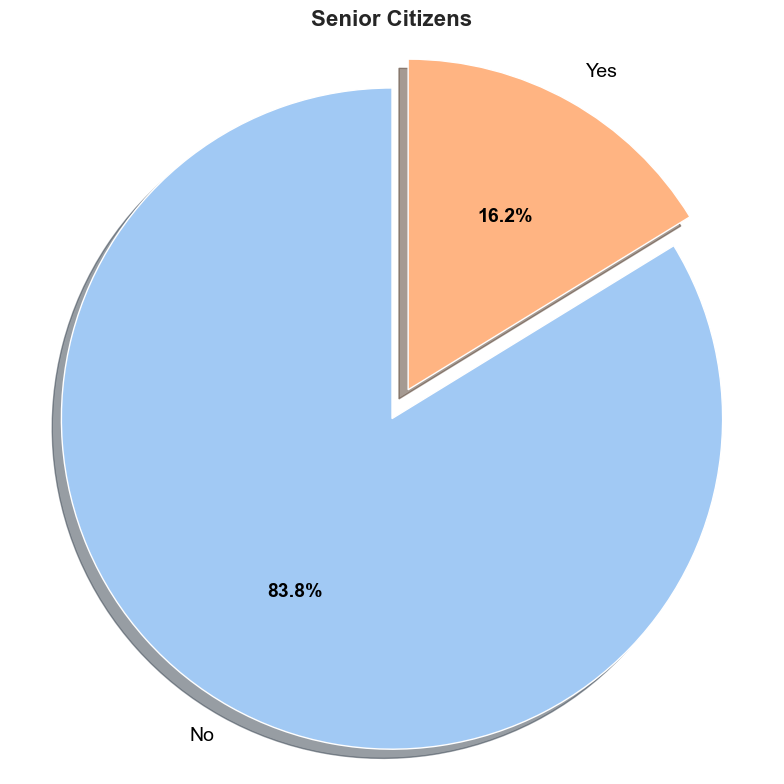

In [14]:
# Suponiendo que df es tu DataFrame y "SeniorCitizen" es la columna con 0 y 1
# Mapear los valores 0 y 1 a "No" y "Yes"
df["SeniorCitizen"] = df["SeniorCitizen"].map({0: "No", 1: "Yes"})

# Contar la cantidad de cada categoría
senior_counts = df["SeniorCitizen"].value_counts()

# Configuración de la figura
plt.figure(figsize=(8, 8))

# Crear el gráfico de pastel
wedges, texts, autotexts = plt.pie(
    senior_counts, 
    labels=senior_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette("pastel"),
    shadow=True,  # Añadir sombra
    explode=[0.05]*len(senior_counts)  # Separar ligeramente las porciones
)

# Estilizar las etiquetas
for text in texts:
    text.set_fontsize(14)
    text.set_color('black')

# Estilizar los porcentajes
for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_color('black')
    autotext.set_weight('bold')

# Añadir título
plt.title("Senior Citizens", fontsize=16, weight='bold')
plt.axis('equal')  # Asegurar que el gráfico de pastel sea un círculo
plt.tight_layout()  # Ajustar el layout para que no se corte nada

# Mostrar el gráfico
plt.show()


Since 16.2% of our customers are seniors, we can determine that the majority of our customers are younger individuals.

# Tenure

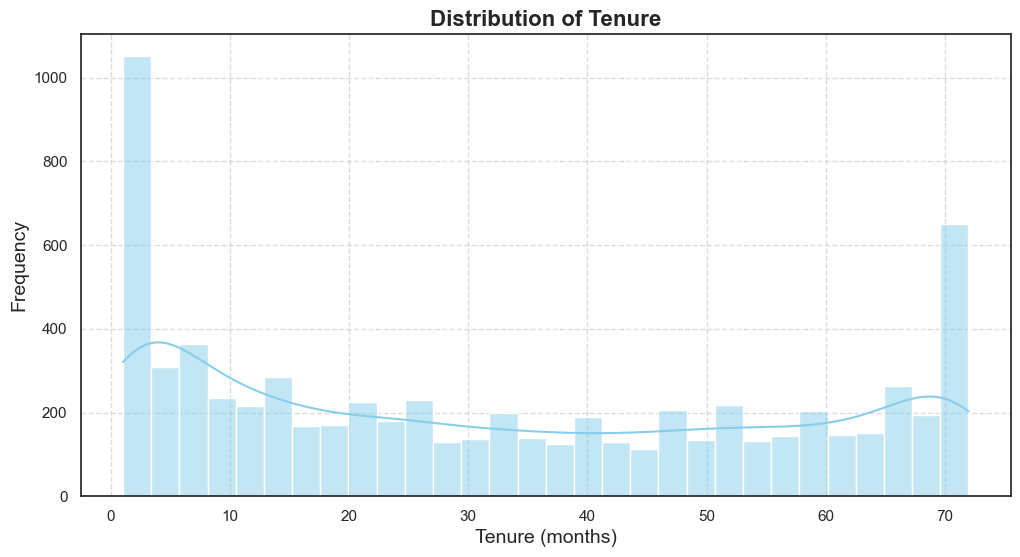

In [16]:
# Configuración de tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear el gráfico de distribución con KDE
sns.histplot(data=df["tenure"], kde=True, color='skyblue', bins=30)

# Añadir títulos y etiquetas
plt.title('Distribution of Tenure', fontsize=16, weight='bold')
plt.xlabel('Tenure (months)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Añadir una cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


We can see that most of our customers who churn either stay for only one month or for 70 or more months.

# Churn by Contract

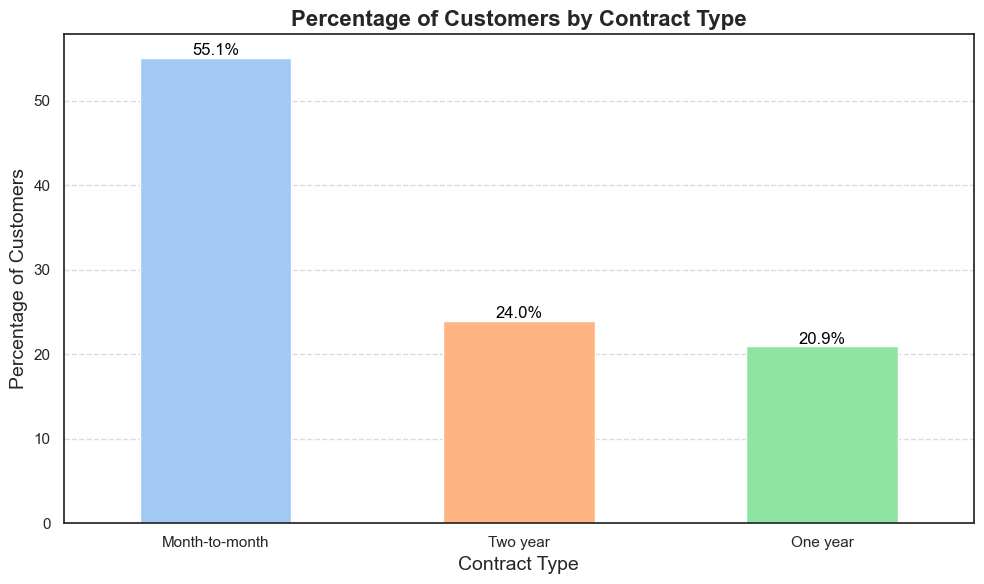

In [18]:
# Calculate the percentage of customers by contract type
contract_percentage = (df['Contract'].value_counts() / len(df)) * 100

# Configuración de tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
ax = contract_percentage.plot(kind='bar', color=sns.color_palette("pastel"), rot=0, width=0.5)

# Añadir etiquetas de porcentaje encima de las barras
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Añadir etiquetas y título
ax.set_ylabel('Percentage of Customers', fontsize=14)
ax.set_xlabel('Contract Type', fontsize=14)
ax.set_title('Percentage of Customers by Contract Type', fontsize=16, weight='bold')

# Añadir cuadrícula
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()



The customers who churn the most are those who opt for monthly payment plans.

# Tenure By Contract

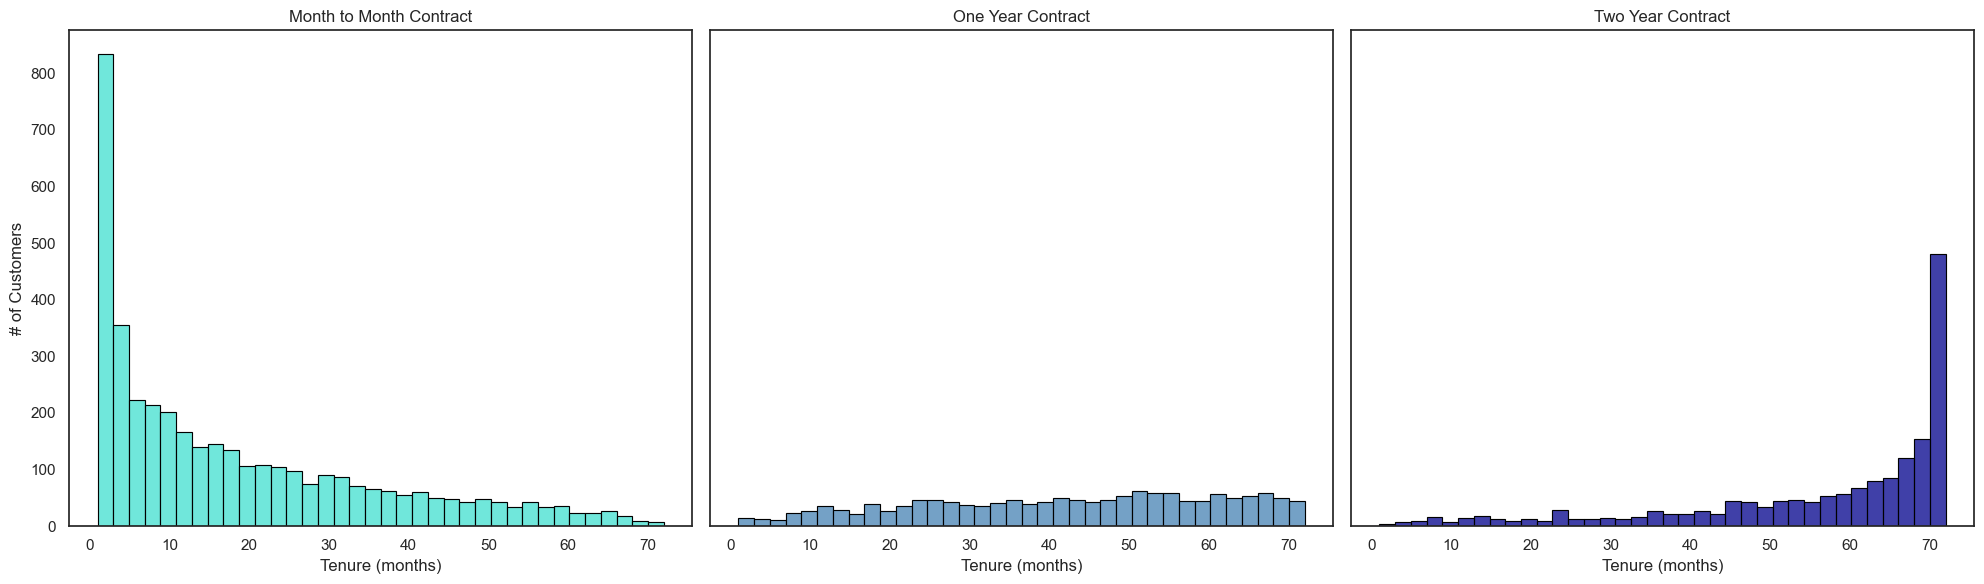

In [20]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 6))

# Plot for Month-to-Month Contract
sns.histplot(data=df[df['Contract']=='Month-to-month'], x='tenure', bins=int(180/5),
             color='turquoise', edgecolor='black', ax=ax1)
ax1.set_ylabel('# of Customers')
ax1.set_xlabel('Tenure (months)')
ax1.set_title('Month to Month Contract')

# Plot for One Year Contract
sns.histplot(data=df[df['Contract']=='One year'], x='tenure', bins=int(180/5),
             color='steelblue', edgecolor='black', ax=ax2)
ax2.set_xlabel('Tenure (months)')
ax2.set_title('One Year Contract')

# Plot for Two Year Contract
sns.histplot(data=df[df['Contract']=='Two year'], x='tenure', bins=int(180/5),
             color='darkblue', edgecolor='black', ax=ax3)
ax3.set_xlabel('Tenure (months)')
ax3.set_title('Two Year Contract')

# Show the plot
plt.tight_layout()
plt.show()


- Month to Month Contract: High initial customer count that quickly diminishes, indicating short-term commitments and possibly high churn rate.
- One Year Contract: More evenly distributed customer tenure with slight peaks, suggesting moderate retention and some long-term customers.
- Two Year Contract: Significant peak at longer tenures, showing a strong customer base with long-term commitments

# Distribution of Services

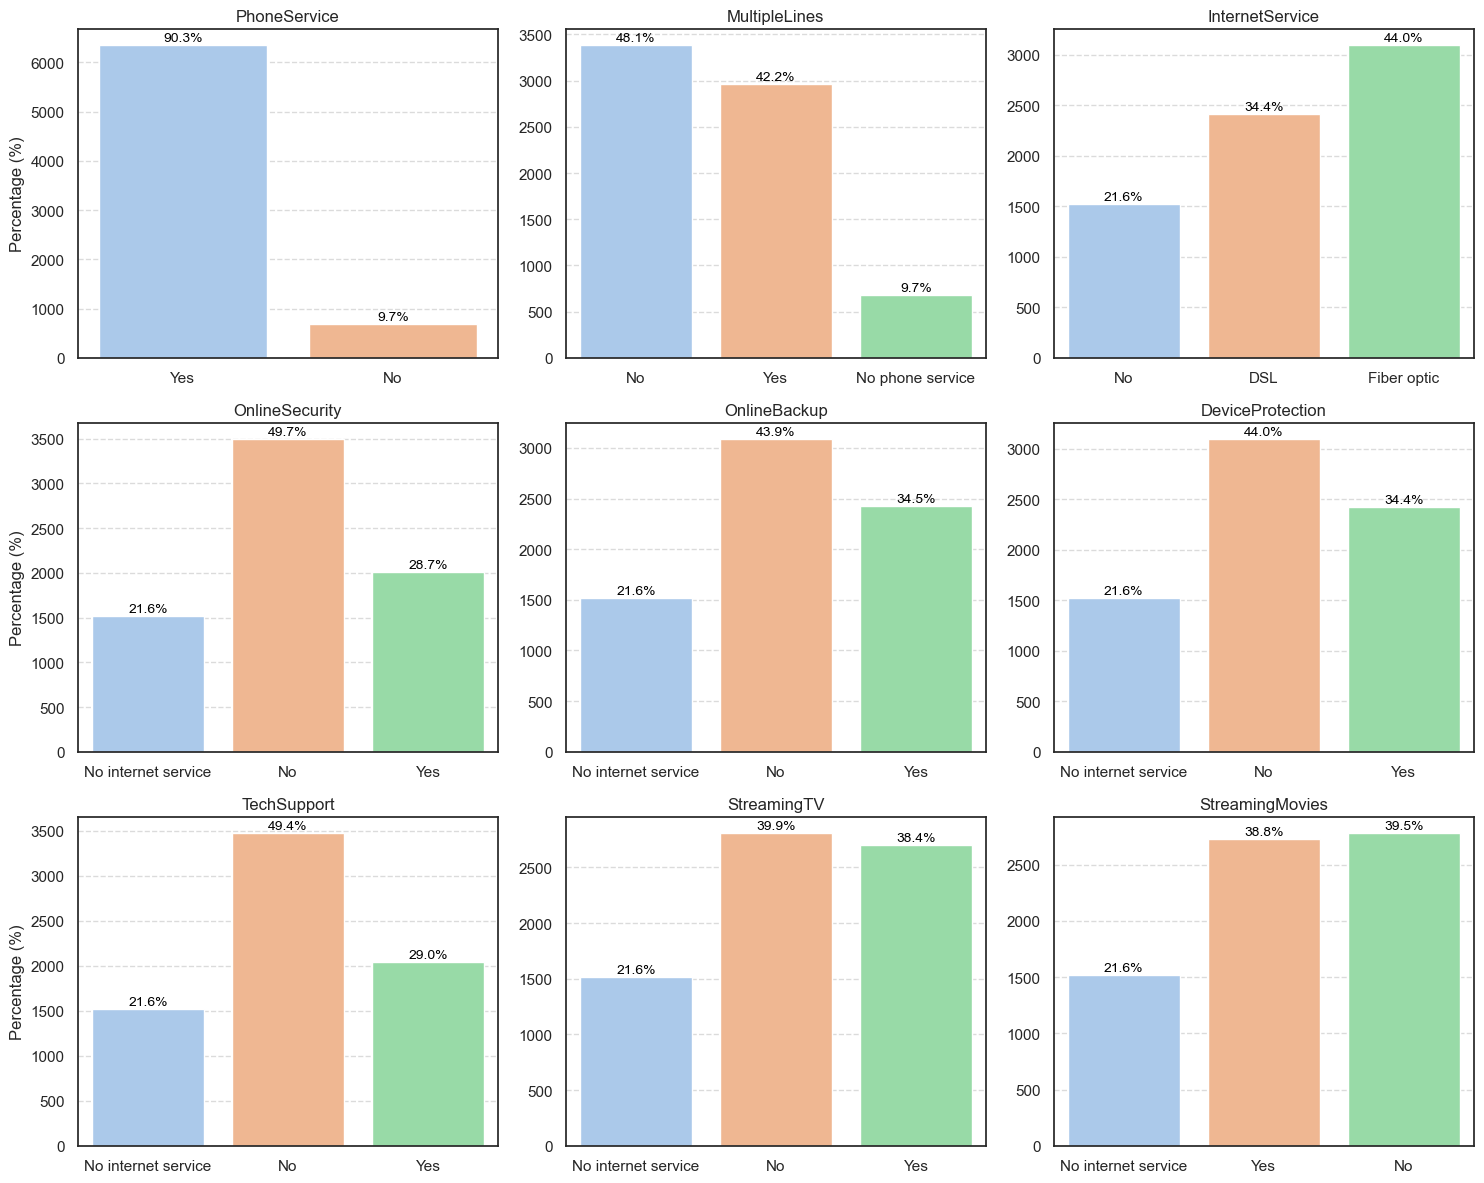

In [23]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
# Set the color palette
sns.set_palette('pastel')

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Iterate over the services and create bar plots with percentages
for i, item in enumerate(services):
    row, col = divmod(i, 3)
    total = float(len(df[item]))  # Total number of entries for normalization
    ax = sns.countplot(x=item, data=df, ax=axes[row, col])
    ax.set_title(item)
    ax.set_xlabel('')  # Remove x-labels if they are not necessary
    ax.set_ylabel('Percentage (%)' if col == 0 else '')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Calculate and add percentage labels
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



# Relation between Monthly Charges and Total Charges

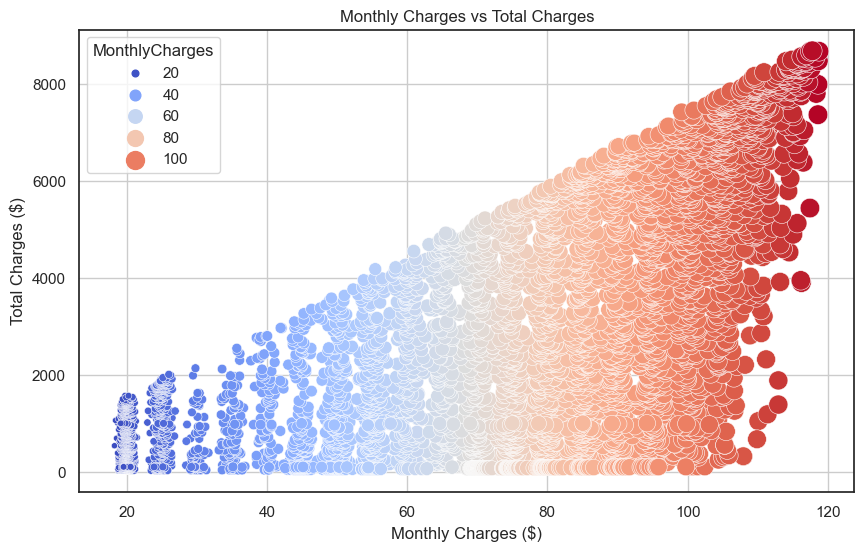

In [26]:
# Assuming 'df' is your DataFrame and it's already been loaded correctly
plt.figure(figsize=(10, 6))
plt.title('Monthly Charges vs Total Charges')
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df, size='MonthlyCharges', hue='MonthlyCharges', palette='coolwarm', sizes=(20, 200))
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Total Charges ($)')
plt.grid(True)
plt.show()


As a customer’s monthly bill rises, we typically see a corresponding increase in their total charges over time. This trend highlights the direct relationship between frequent service usage and overall expenditure.

# Churn Rate

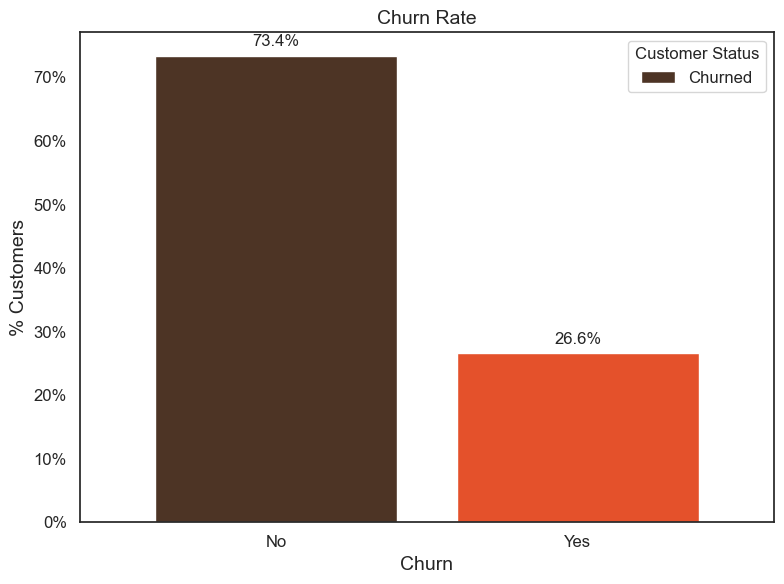

In [27]:
colors = ['#4D3425','#E4512B']
ax = (df['Churn'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                        stacked=True,
                                                        rot=0,
                                                        color=colors,
                                                        figsize=(8,6),
                                                        width=0.8)  # Adjust bar width here
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('Churn', size=14)
ax.set_title('Churn Rate', size=14)
ax.tick_params(axis='both', which='major', labelsize=12)  # Adjust tick parameters here

# Add data labels
for p in ax.patches:
    ax.annotate(str(format(p.get_height(), '.1f')) + '%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.legend(title='Customer Status', labels=['Churned', 'Retained'], fontsize=12)  # Add legend here
plt.tight_layout()
plt.show()


We have a churn rate around 25%

# Relation between Churn and Tenure

Text(1, 15.0, 'Median: 10.0')

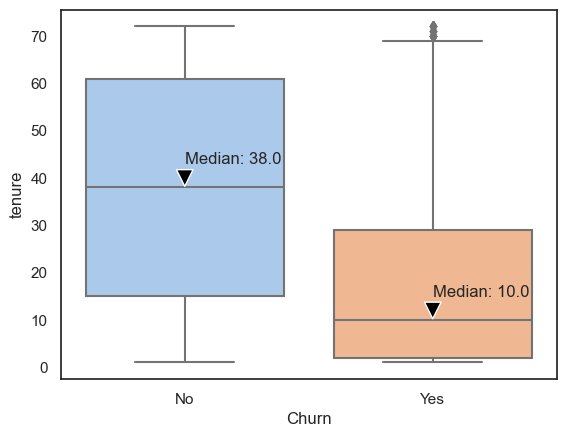

In [28]:
# Create the boxplot
boxplot = sns.boxplot(x='Churn', y='tenure', data=df)

# Calculate median tenure for each group
median_tenure_no = df[df['Churn'] == 'No']['tenure'].median()
median_tenure_yes = df[df['Churn'] == 'Yes']['tenure'].median()

# Annotate the median tenure
plt.annotate(f'Median: {median_tenure_no}', xy=(0, median_tenure_no), xytext=(0, median_tenure_no+5),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate(f'Median: {median_tenure_yes}', xy=(1, median_tenure_yes), xytext=(1, median_tenure_yes+5),
             arrowprops=dict(facecolor='black', shrink=0.05))


- Tenure Distribution:
For customers who have not churned (“No”), the median tenure is 38.0 months, with a range extending from about 10 to nearly 65 months, and some outliers reaching up to 70 months.
For customers who have churned (“Yes”), the median tenure is significantly lower at 10.0 months, with the majority having a tenure of less than 30 months and outliers just above this range.


- Business Implications: This visual suggests that customers who stay longer are less likely to churn, highlighting the importance of strategies aimed at increasing customer tenure to reduce churn rates.

# Churn by Contract Type

<Figure size 1200x800 with 0 Axes>

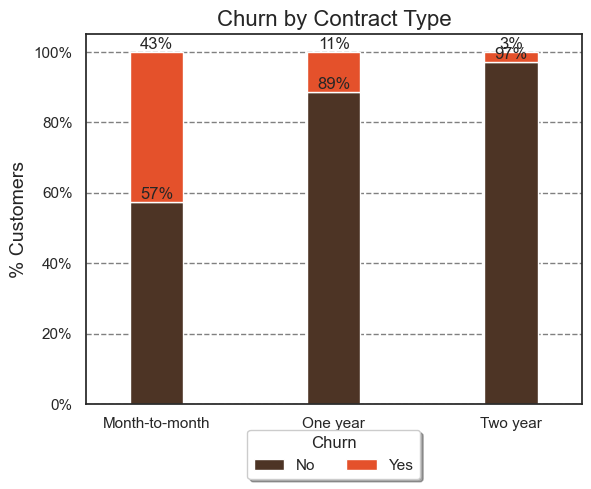

In [31]:
# Assuming 'df' is your DataFrame and it's already been processed as needed
colors = ['#4D3425','#E4512B', '#00A1C1']
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

# Calculate the percentage of churn for each contract type
contract_churn_percent = (contract_churn.T * 100.0 / contract_churn.T.sum()).T

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the bar plot
ax = contract_churn_percent.plot(kind='bar',
                                 width=0.3,
                                 stacked=True,
                                 rot=0,
                                 color=colors)

# Set the y-axis formatter to percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Add gridlines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')

# Set labels and title
ax.set_ylabel('% Customers', size=14)
ax.set_title('Churn by Contract Type', size=16)

# Update legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2, title='Churn')

# Add data labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width/2, 
            y + height, 
            '{:.0f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='bottom')

# Show the plot
plt.show();


- Month-to-Month Contracts: High churn rate with 57% of customers leaving.
- One-Year Contracts: Lower churn rate with only 11% of customers leaving.
- Two-Year Contracts: Very low churn rate with just 3% of customers leaving.

# Churn by Seniority Level

<Figure size 1000x700 with 0 Axes>

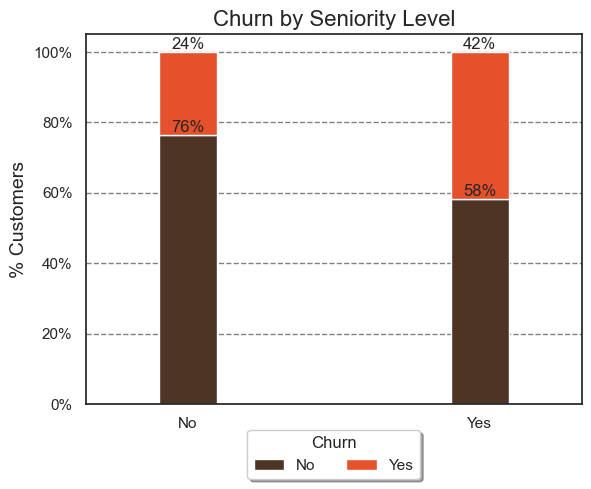

In [33]:
# Assuming 'df' is your DataFrame and it's already been processed as needed
colors = ['#4D3425','#E4512B']
seniority_churn = df.groupby(['SeniorCitizen','Churn']).size().unstack()

# Calculate the percentage of churn for each seniority level
seniority_churn_percent = (seniority_churn.T * 100.0 / seniority_churn.T.sum()).T

# Set the figure size
plt.figure(figsize=(10, 7))

# Create the bar plot
ax = seniority_churn_percent.plot(kind='bar',
                                  width=0.2,
                                  stacked=True,
                                  rot=0,
                                  color=colors)

# Set the y-axis formatter to percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Add gridlines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')

# Set labels and title
ax.set_ylabel('% Customers', size=14)
ax.set_title('Churn by Seniority Level', size=16)

# Update legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2, title='Churn')

# Add data labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width/2, 
            y + height, 
            '{:.0f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='bottom')

# Show the plot
plt.show()


- Non-Senior Customers: A lower churn rate with 76% not churning.
- Senior Customers: A higher churn rate with 42% churning.

# Churn by Monthly Charges

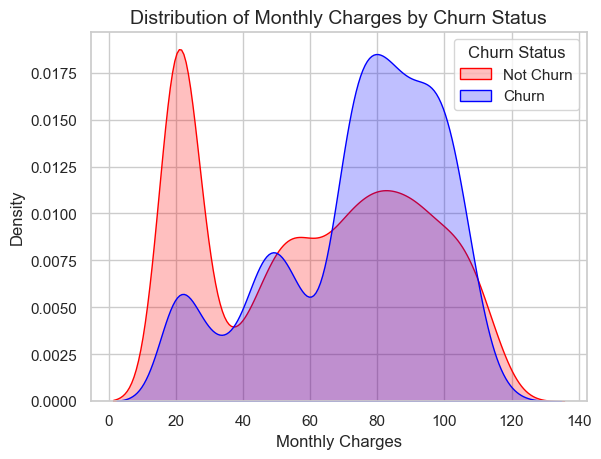

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plot KDE for 'Not Churn'
sns.kdeplot(data=df[df["Churn"] == 'No'], x="MonthlyCharges",
            color="Red", fill=True, label="Not Churn")

# Plot KDE for 'Churn'
sns.kdeplot(data=df[df["Churn"] == 'Yes'], x="MonthlyCharges",
            color="Blue", fill=True, label="Churn")

# Enhance the legend
plt.legend(title='Churn Status', loc='upper right')

# Set labels and title with increased font size for better readability
plt.ylabel('Density', fontsize=12)
plt.xlabel('Monthly Charges', fontsize=12)
plt.title('Distribution of Monthly Charges by Churn Status', fontsize=14)

# Display the plot
plt.show()

Customers with higher monthly charges tend to churn less. This could be because they receive more value or have a greater need for the service.

# Churn By Total Charges

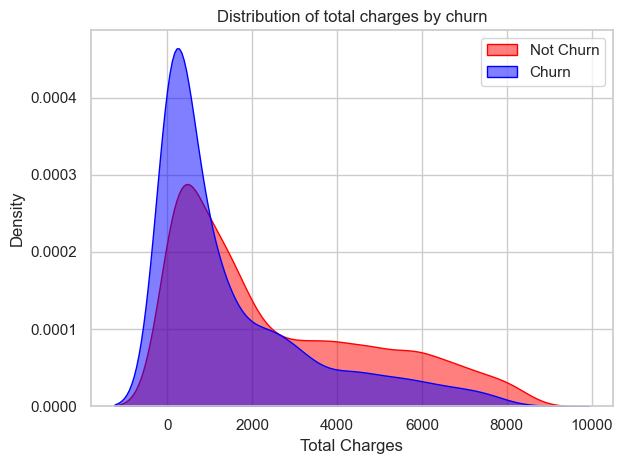

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'

# Improved kdeplot with fill instead of shade
ax = sns.kdeplot(
    df.TotalCharges[df["Churn"] == "No"],
    color="red",
    fill=True,
    alpha=0.5,  # Add some transparency for better overlap visualization
    label="Not Churn"
)
sns.kdeplot(
    df.TotalCharges[df["Churn"] == "Yes"],
    ax=ax,
    color="blue",
    fill=True,
    alpha=0.5,
    label="Churn"
)

# Legend and labels (already included in your code)
ax.legend(loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

# Optional: Adjust plot size for better readability
plt.tight_layout()
plt.show()


Customers with lower total charges tend to churn at a higher rate. This could be because they find less value in the service or have a lesser need for it.